**Chuẩn bị thư viện**

In [8]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

**Dựng mô hình**

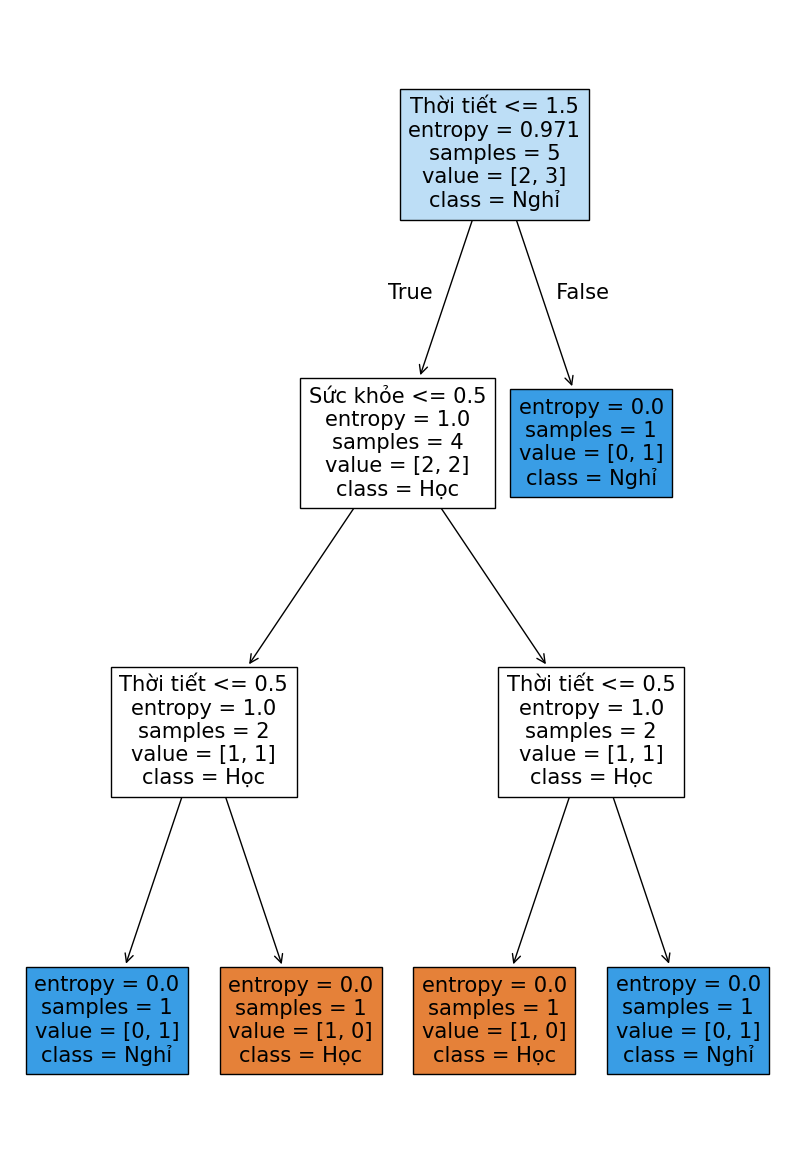

In [2]:
df = pd.read_excel("data/lophoc.xlsx")

# Mã hóa cột 'Sức khỏe'
encHealth = preprocessing.LabelEncoder()
df['Sức khỏe'] = encHealth.fit_transform(df['Sức khỏe'])

# Mã hóa cột 'Thời tiết'
encWeather = preprocessing.LabelEncoder()
df['Thời tiết'] = encWeather.fit_transform(df['Thời tiết'])

# Mã hóa cột 'Kết quả'
encResult = preprocessing.LabelEncoder()
df['Kết quả'] = encResult.fit_transform(df['Kết quả'])

# Tạo tập dữ liệu Input (X) và Output (y)
X = df[['Sức khỏe', 'Thời tiết']].values  # Đặc trưng
y = df['Kết quả'].values  # Mục tiêu

# Chia tập dữ liệu thành train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# Khởi tạo mô hình Decision Tree với tiêu chí 'entropy'
modelDT = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Huấn luyện mô hình với tập dữ liệu train
modelDT = modelDT.fit(X_train, y_train)

plt.figure(figsize=(10, 15))
plot_tree(modelDT, feature_names=["Sức khỏe", "Thời tiết"], class_names=["Học", "Nghỉ"], filled=True)
plt.show()

**Cách làm**

Ta có tập huấn luyện là:

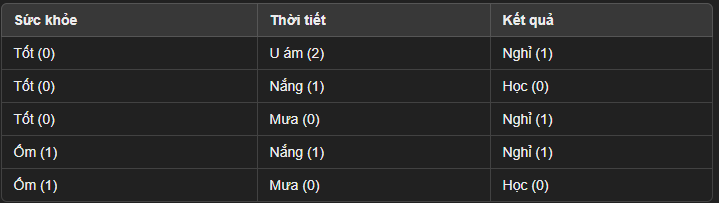

Bước 1: Tính Entropy tổng

Có 3 nghỉ, 2 học nên Entropy tổng là

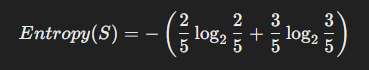

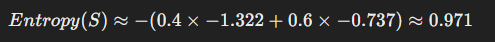

Bước 2: Tính Entropy trên từng nhóm
* NHÓM SỨC KHỎE
  * sức khỏe TỐT có 2 nghỉ, 1 học

  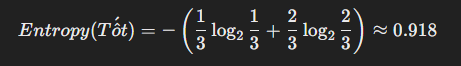
  * sức khỏe ỐM có 1 nghỉ, 1 học

  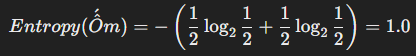
  * Entropy trọng số sức khỏe

  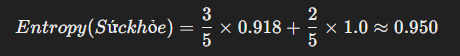

  * IG
  
  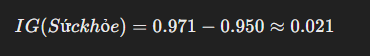

* NHÓM THỜI TIẾT

  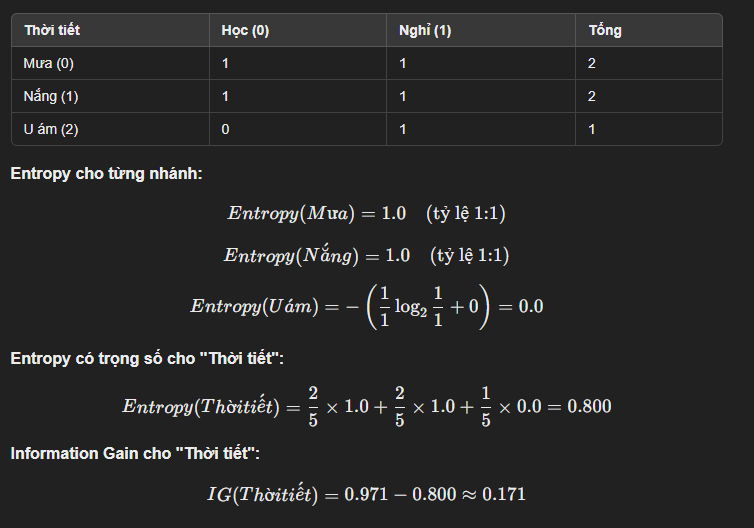

Bước 3: Chọn thuộc tính phân chia đầu tiên
* IG(Sức khỏe) = 0.021
* IG(Thời tiết) = 0.171

Vì Information Gain của "Thời tiết" cao hơn, chúng ta chọn "Thời tiết" làm nút gốc của cây quyết định

Bước 4: tiêu chí chọn phân chia

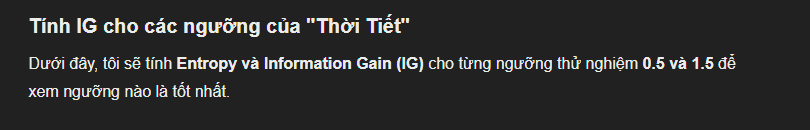

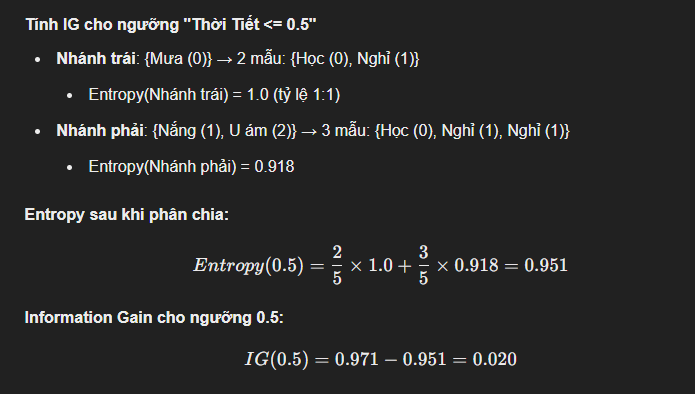

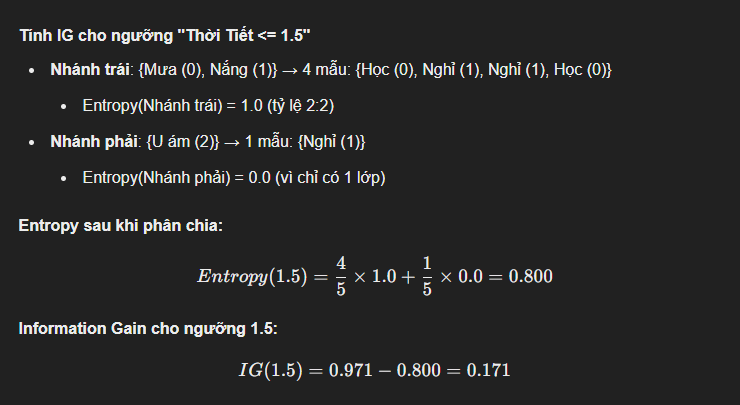

Do IG(1.5) = 0.171 > IG (0.5) = 0.020 nên chọn phân theo ngưỡng **Thời Tiết <= 1.5**

Vậy đã ra được gốc cha

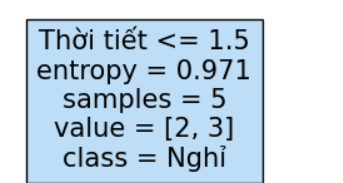

**THỰC HIỆN TIẾP TỤC SẼ RA ĐƯỢC CÁI CÂY**